# Лабораторная работа № 05 (предварительный анализ данных)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1: Детекция аномалий в данных кредитного скоринга

Используйте набор данных кредитного скоринга с Kaggle ([ссылка на данные](https://www.kaggle.com/mlg-ulb/creditcardfraud)) и определите аномалии в данных, используя Z-score или IQR. 

In [3]:
data = pd.read_csv('data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


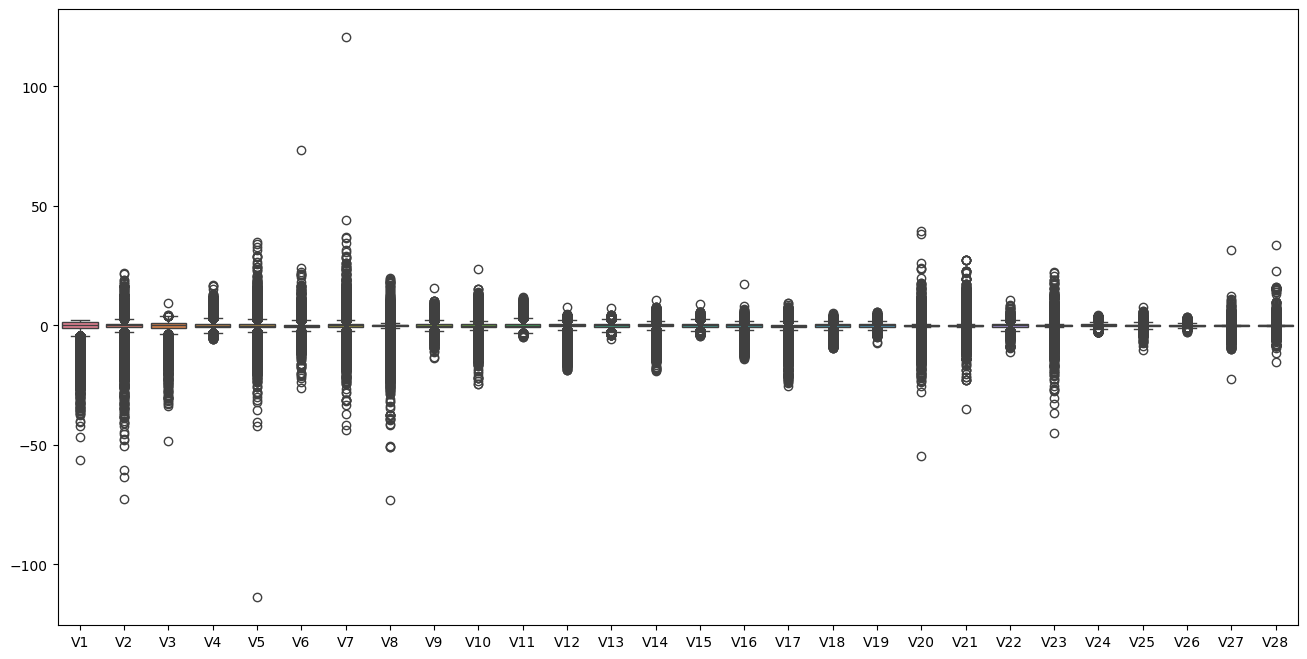

In [48]:
plt.figure(figsize=(16, 8))
sns.boxplot(data.iloc[:, 1:29])
plt.show()

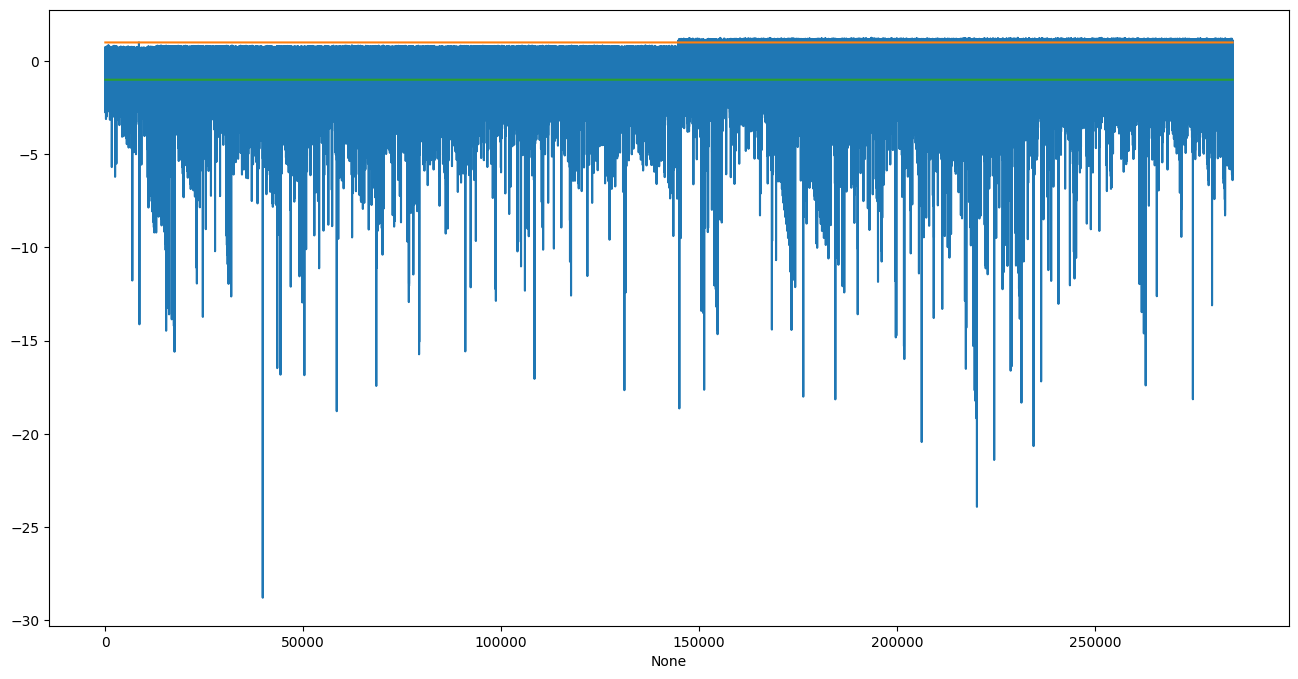

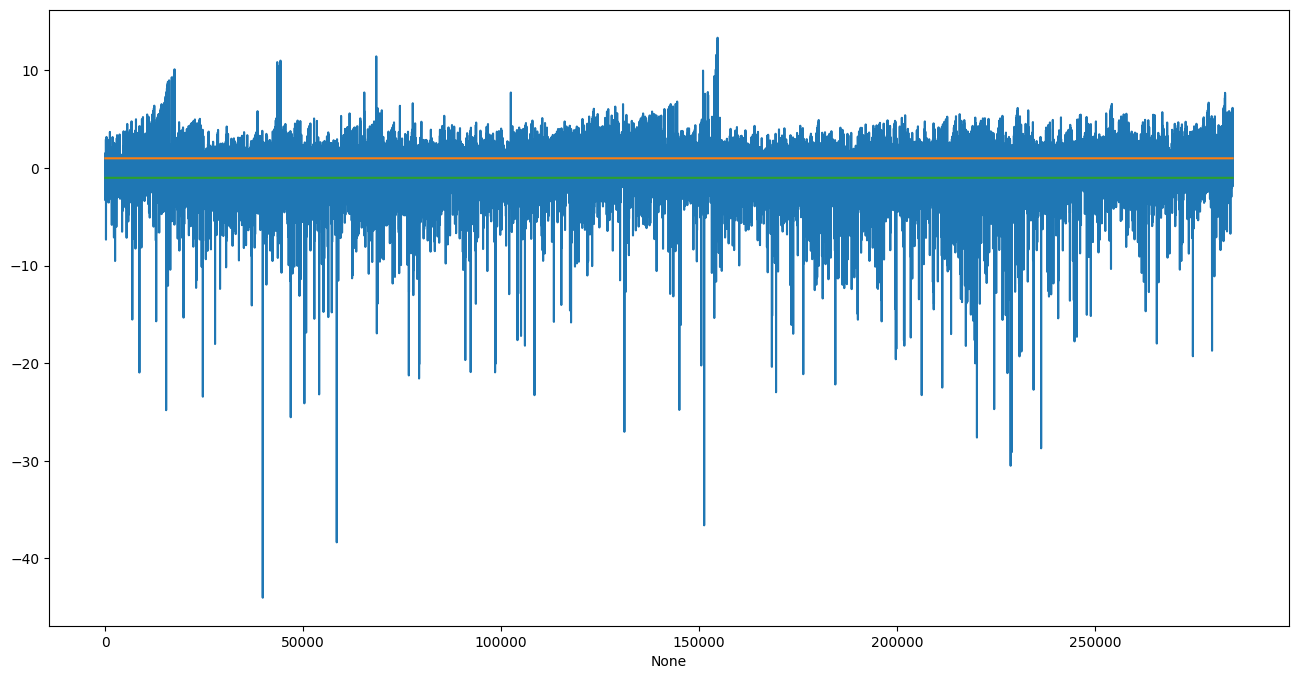

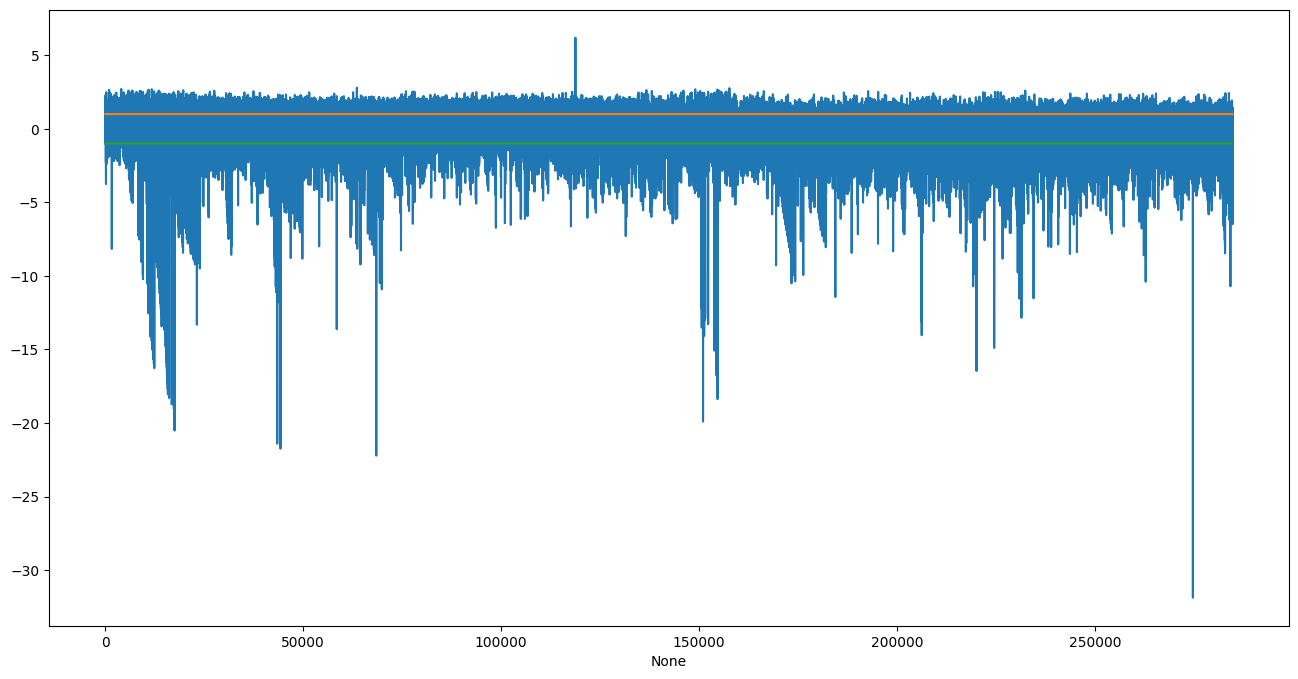

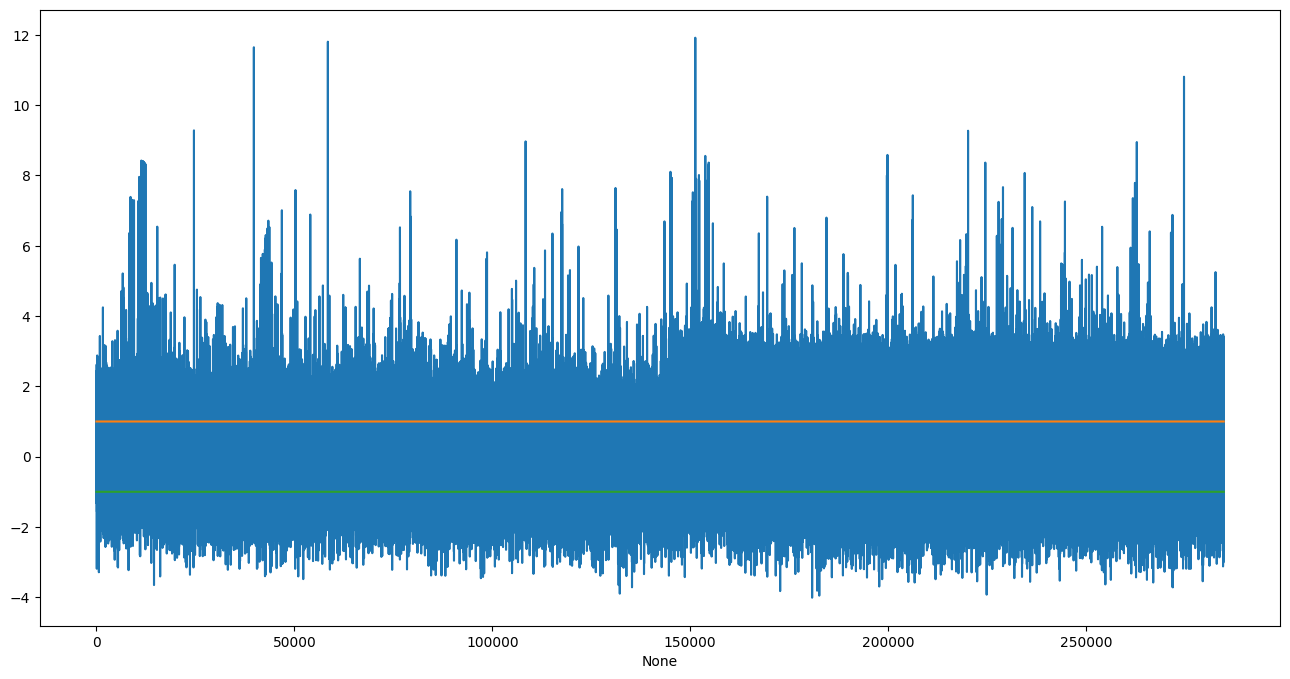

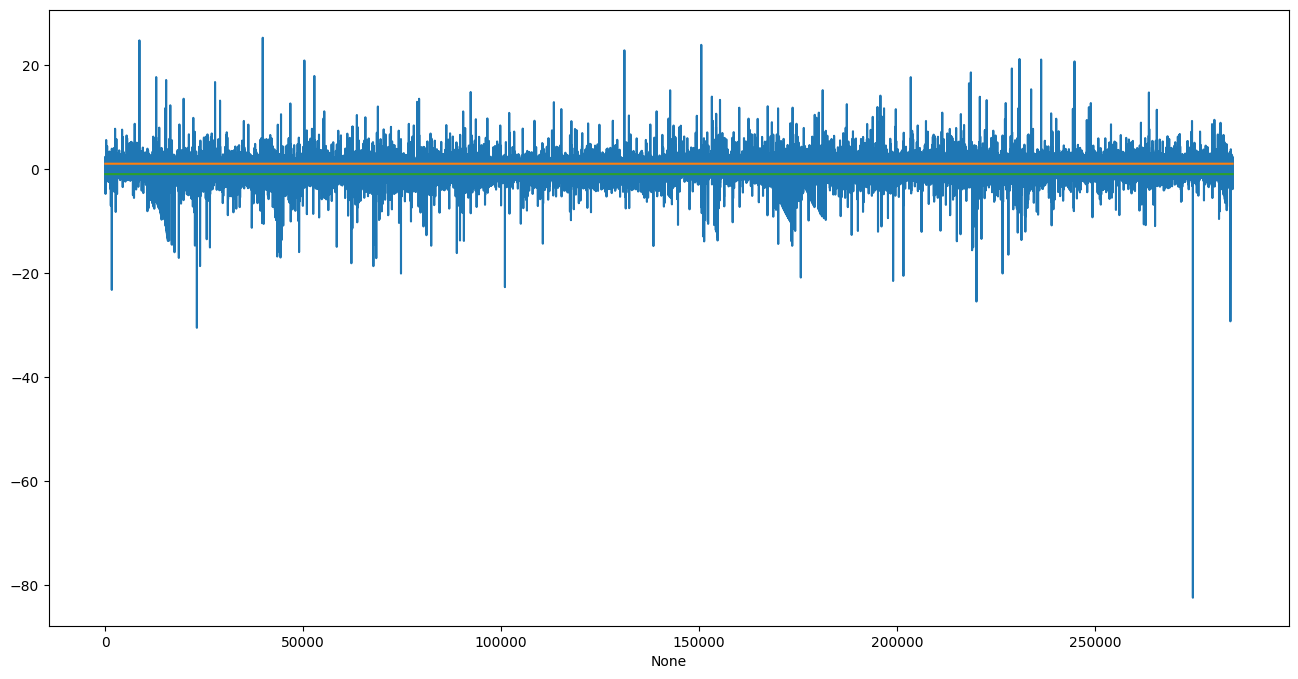

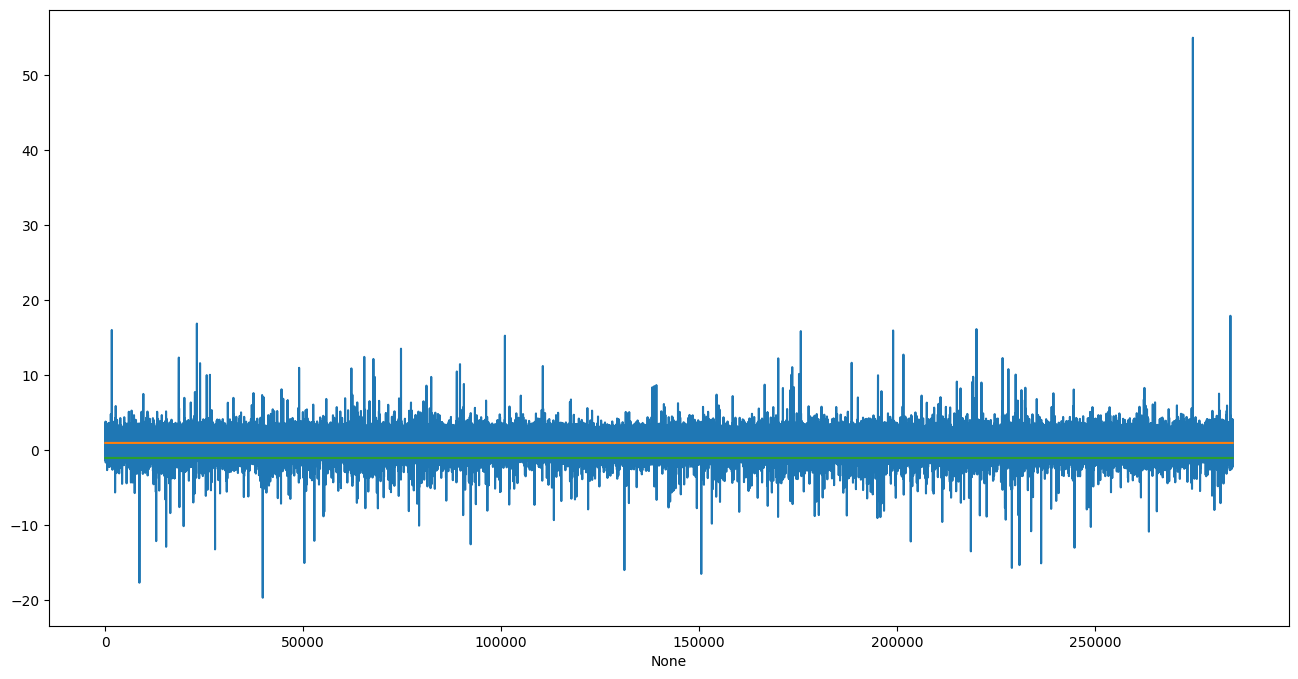

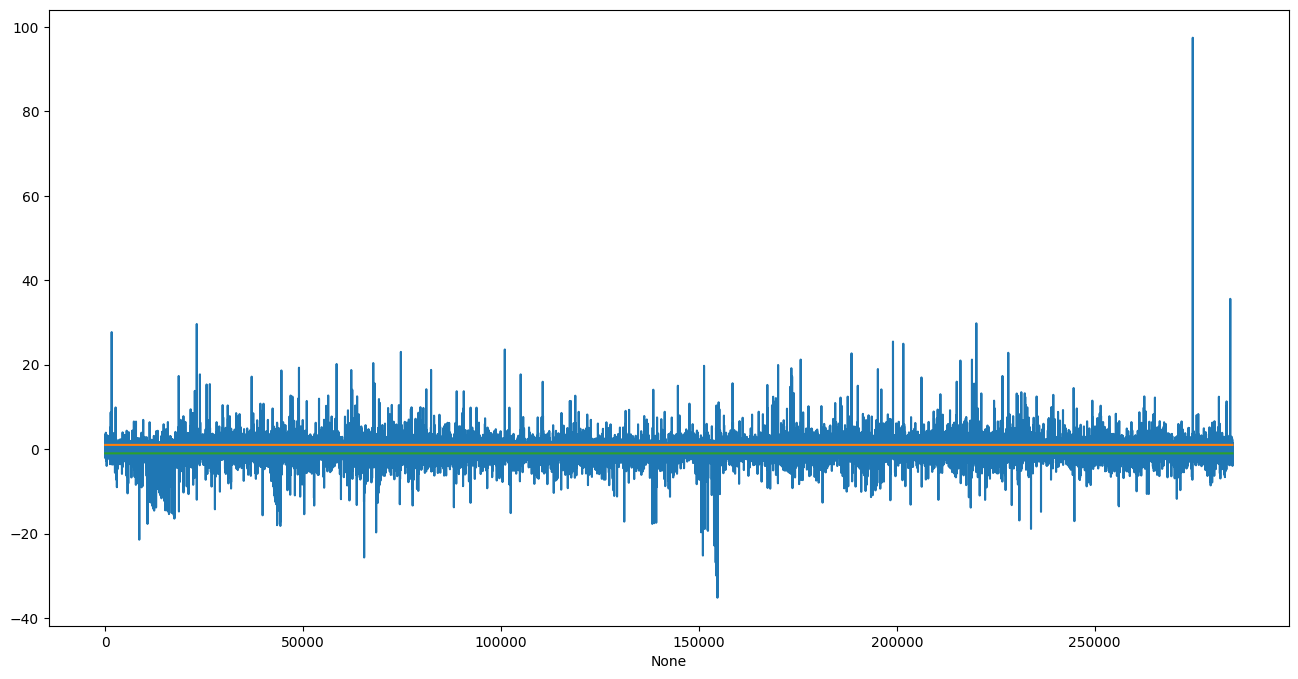

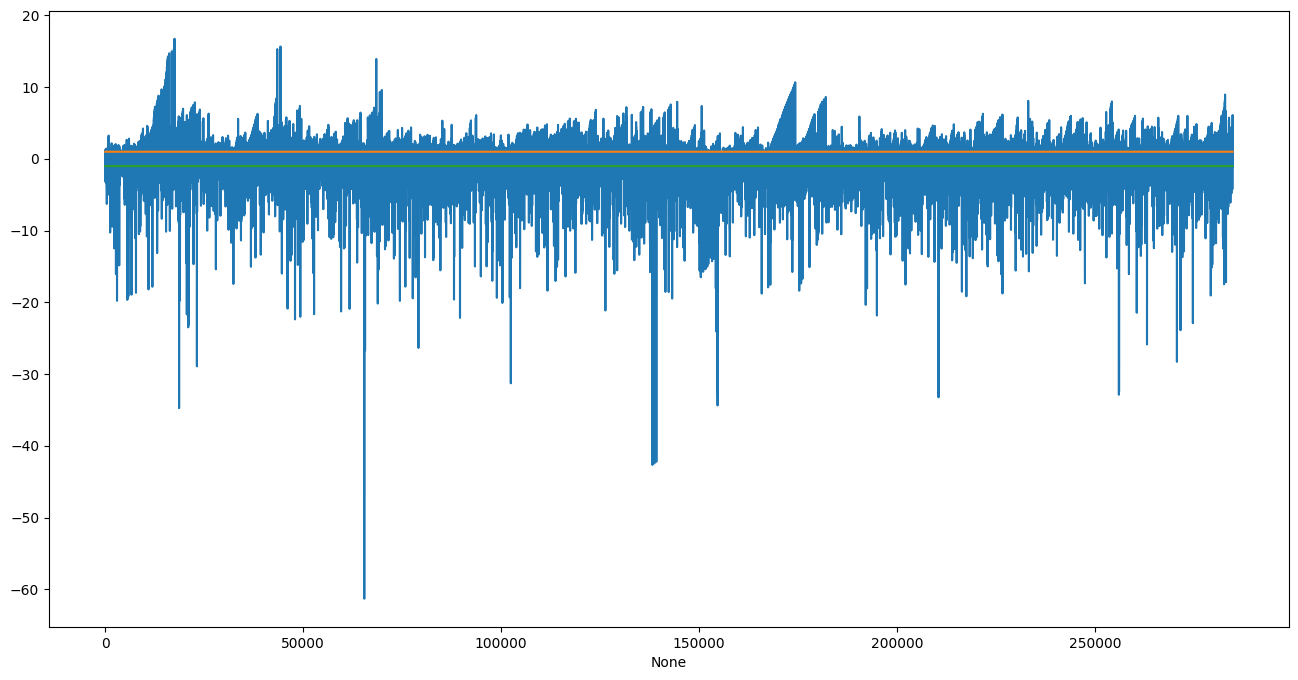

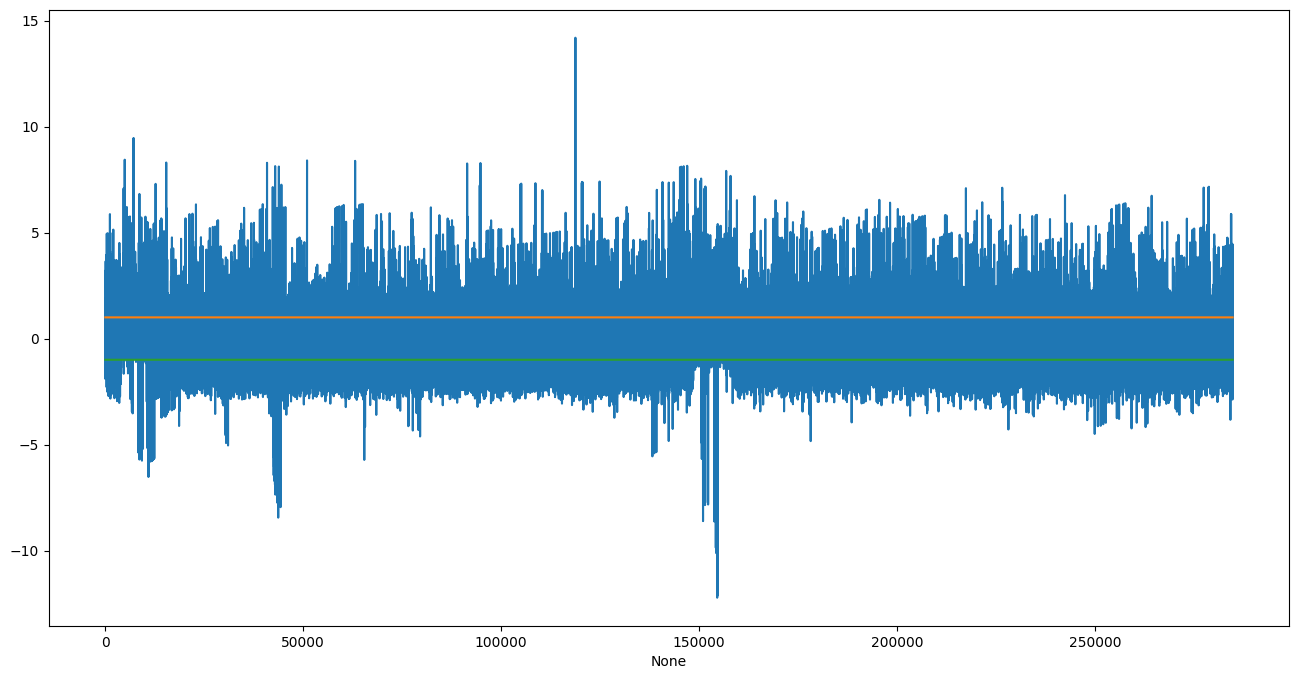

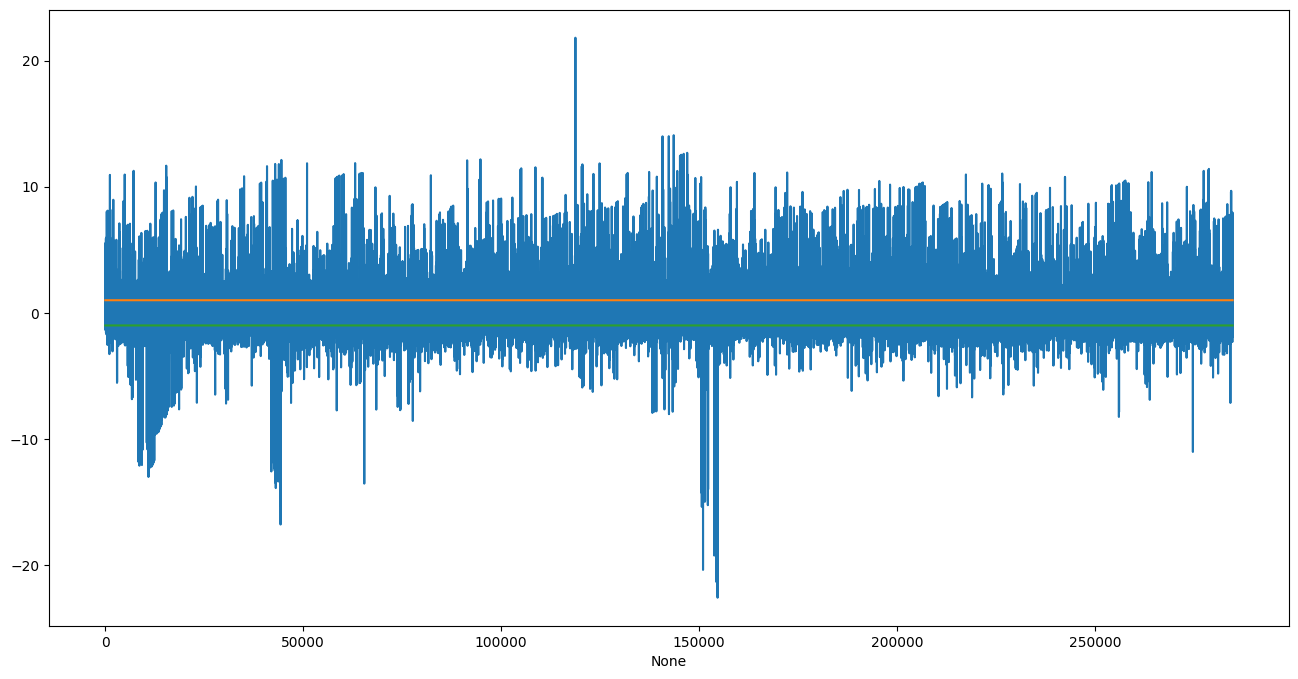

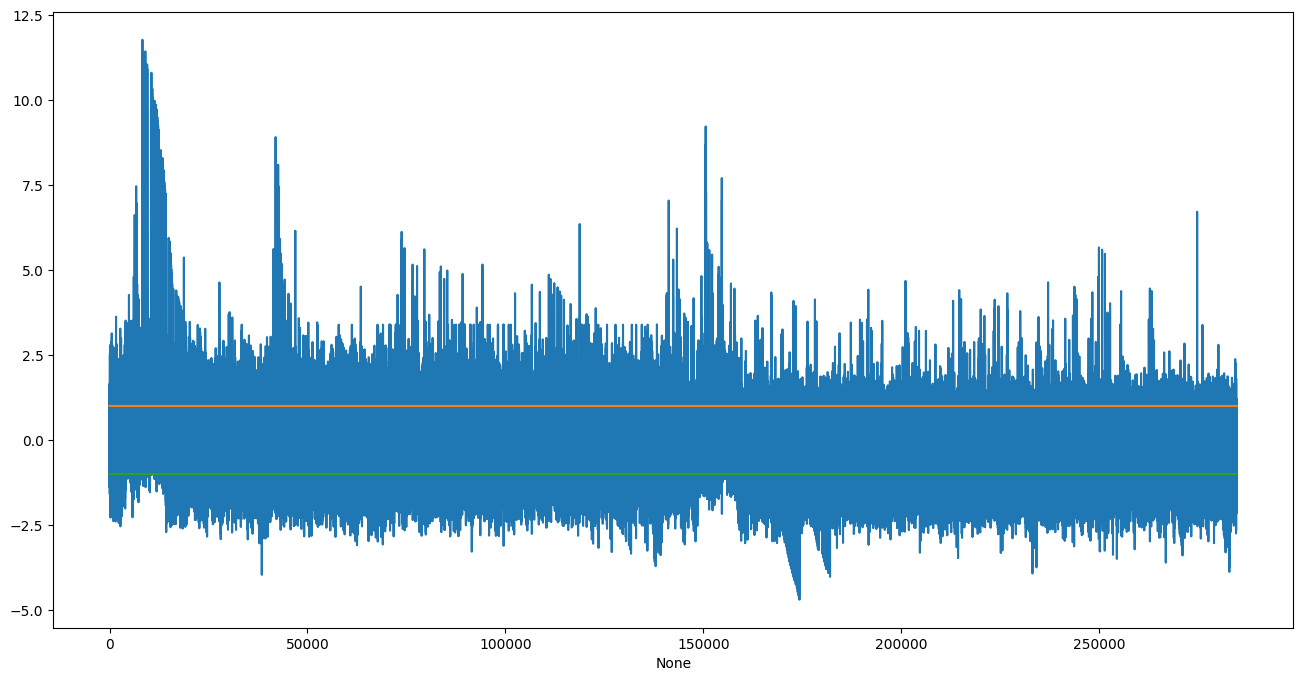

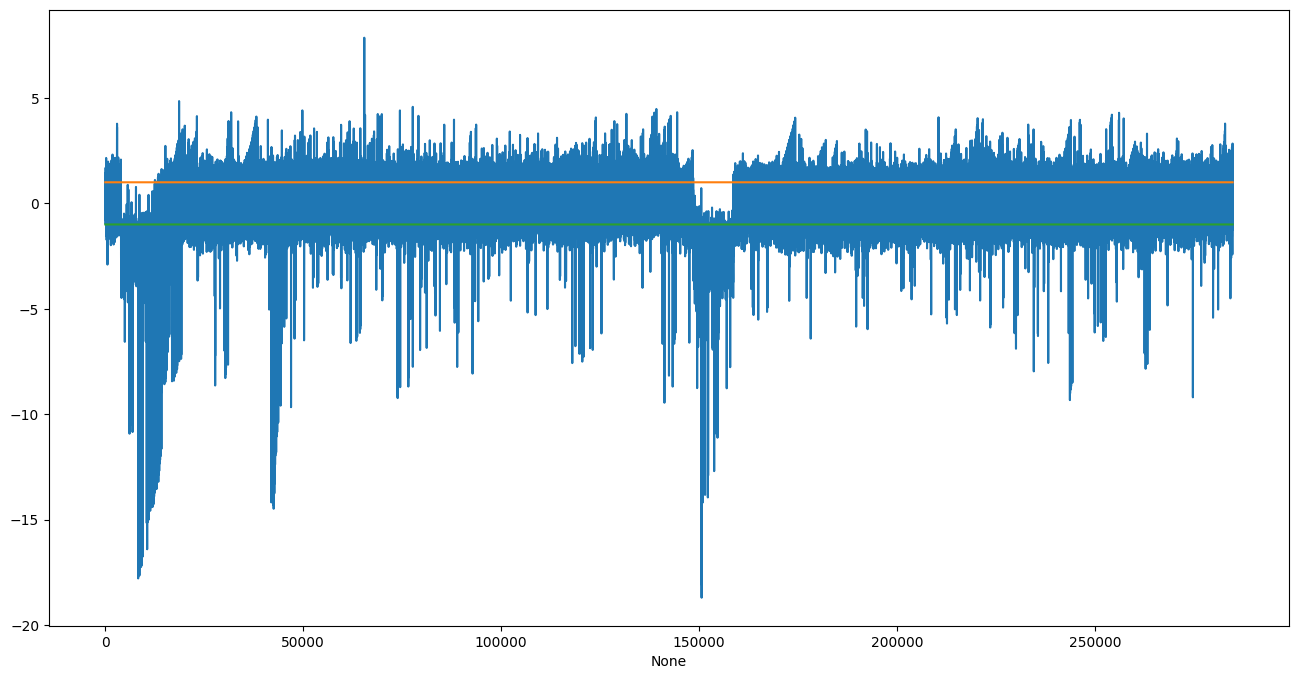

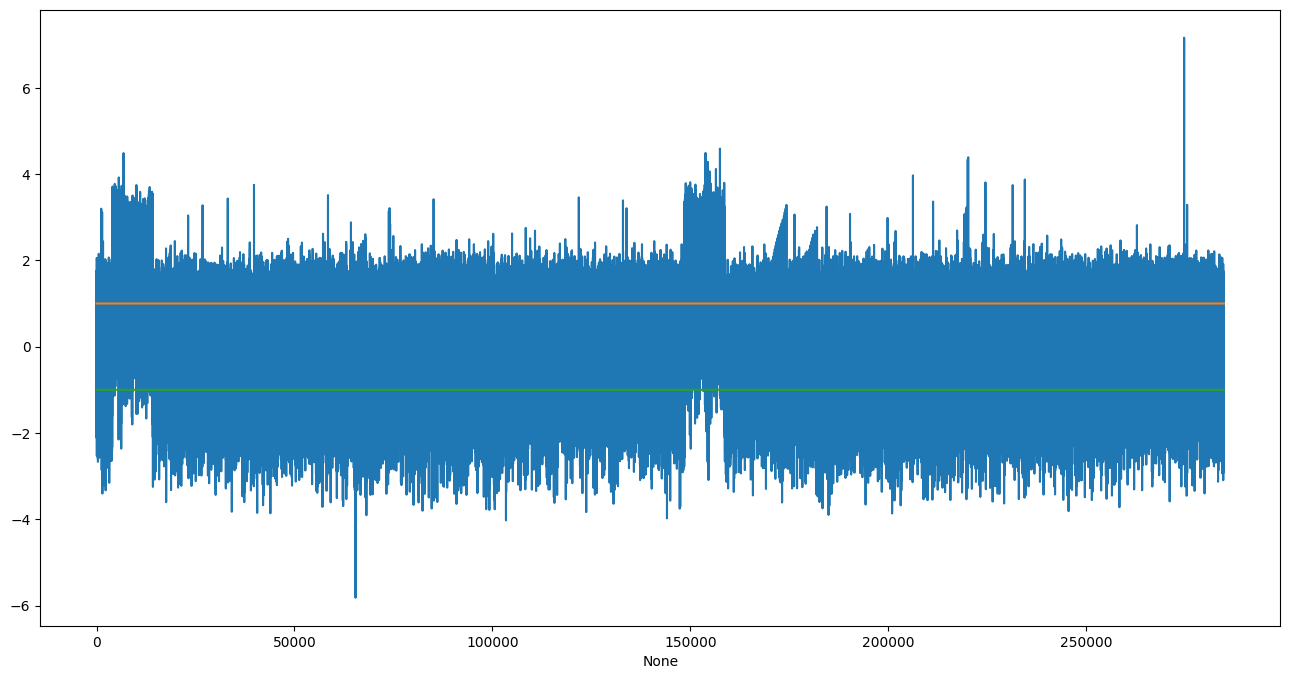

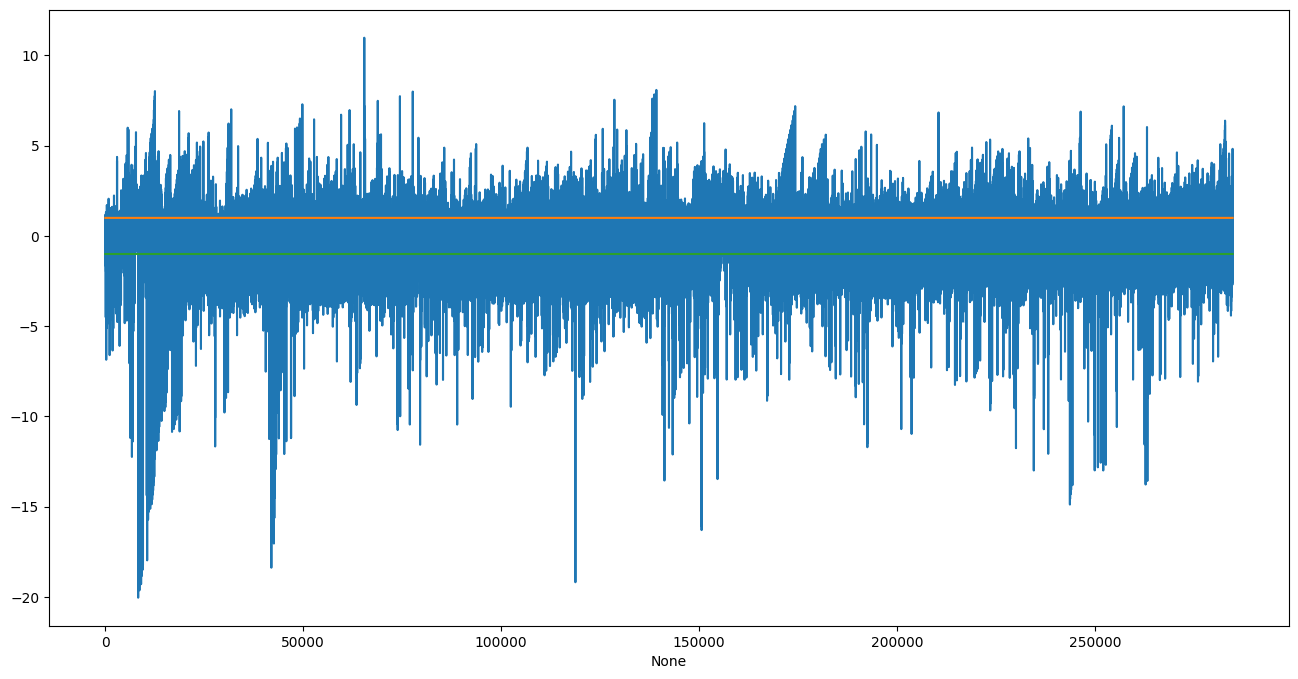

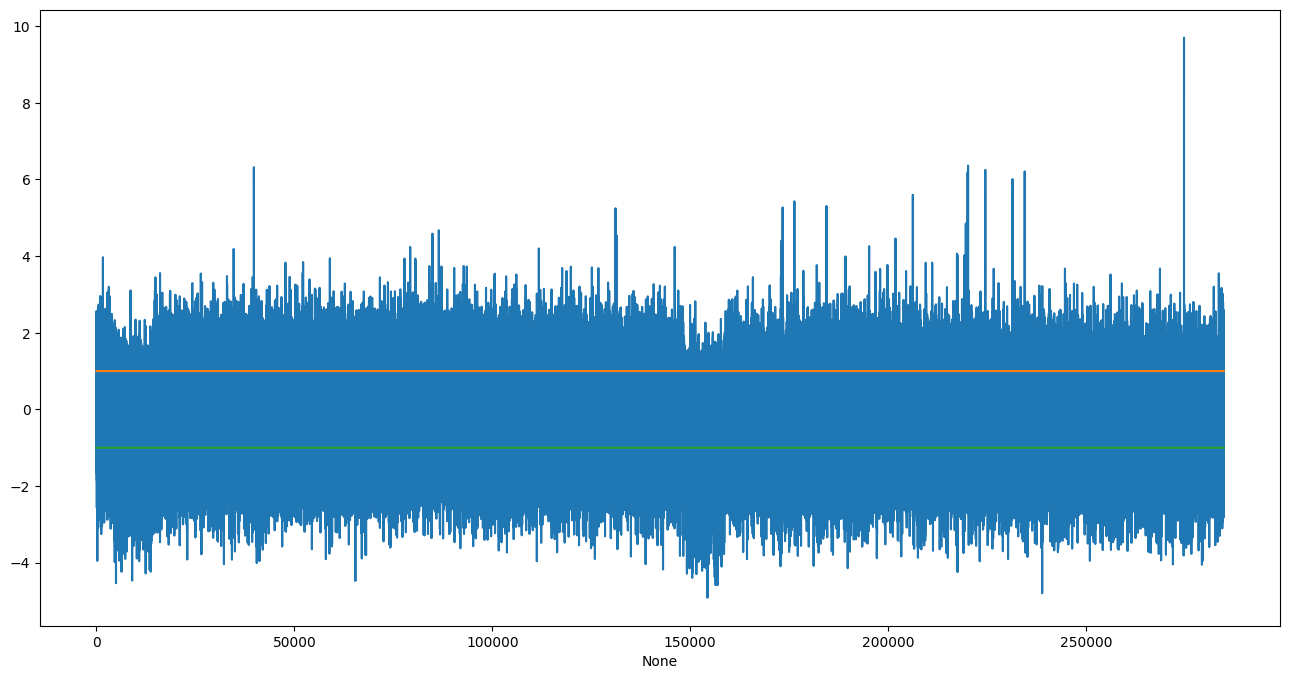

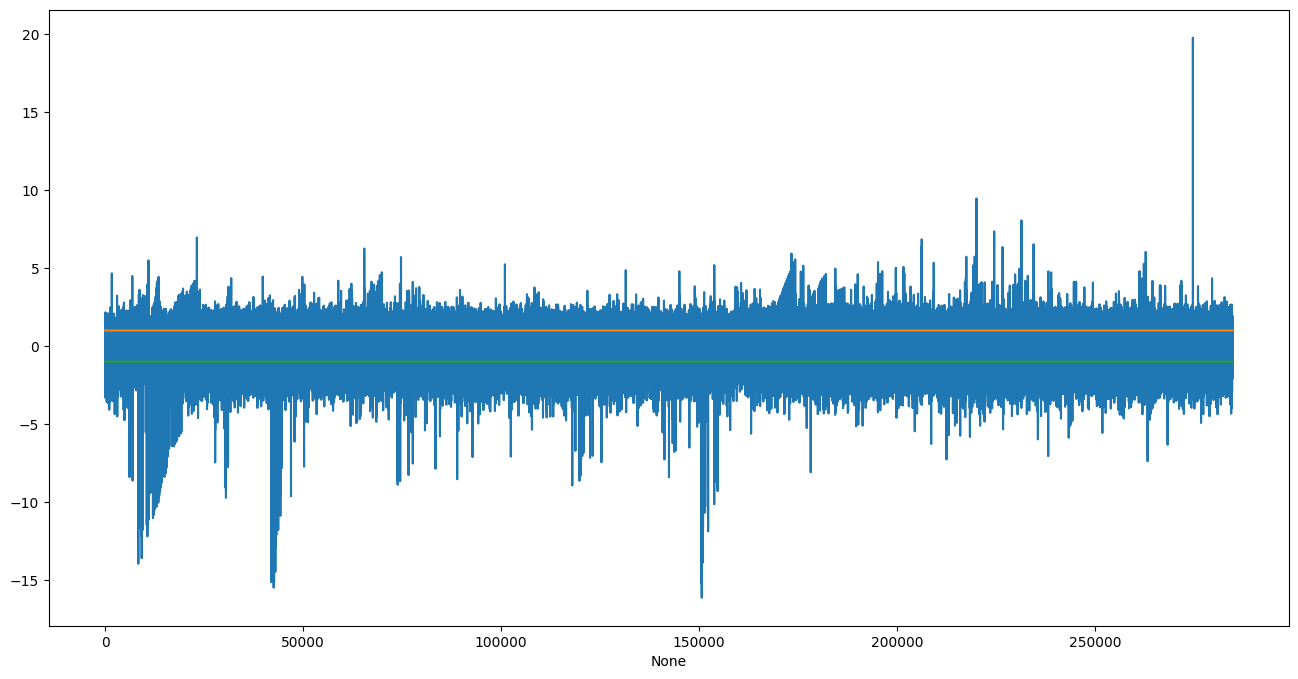

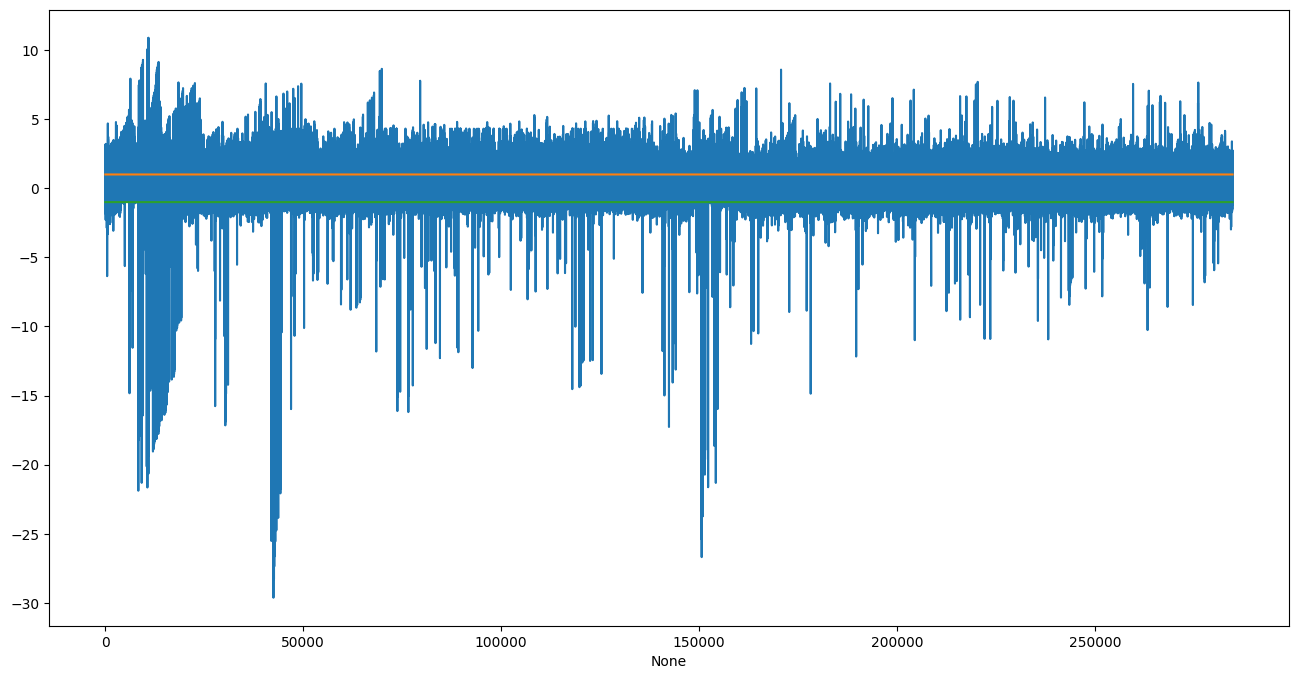

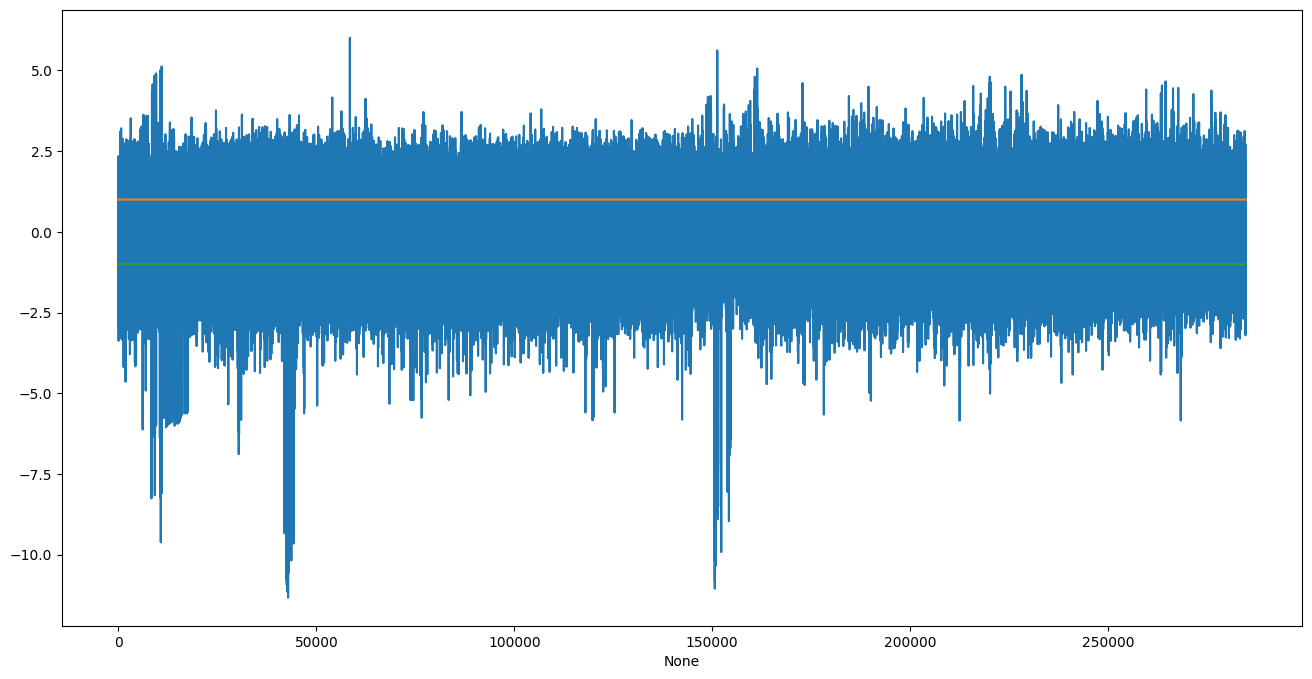

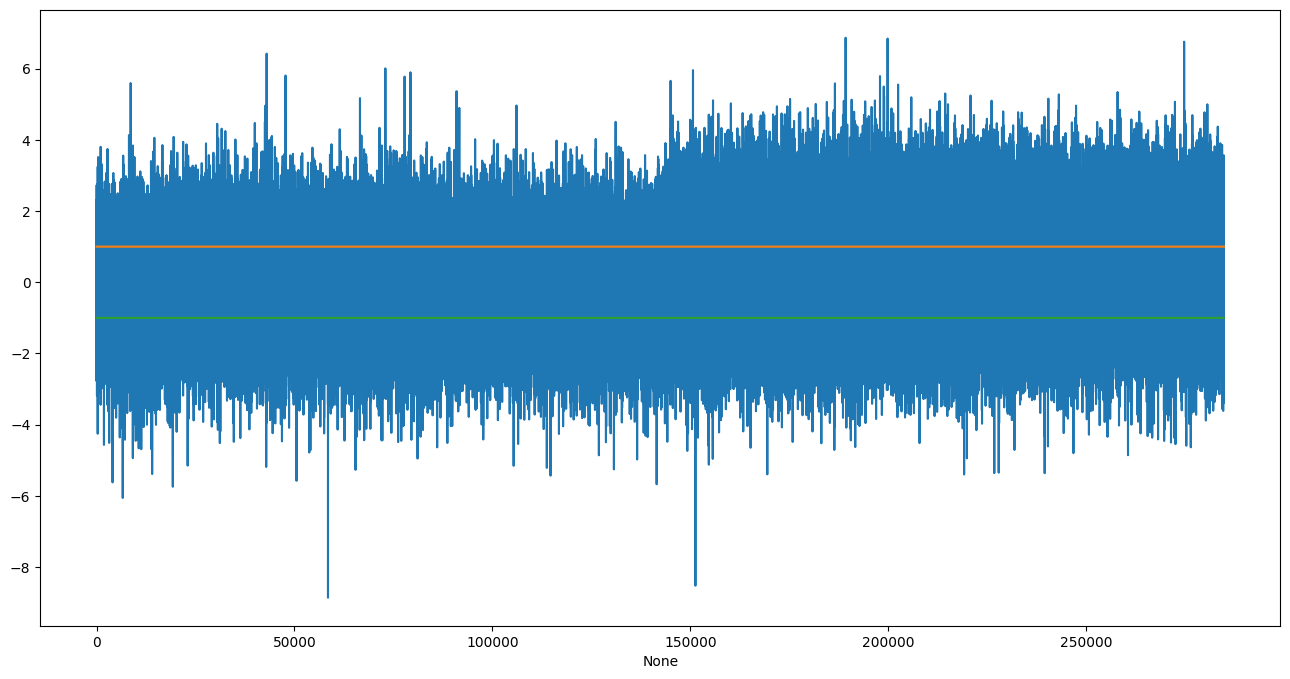

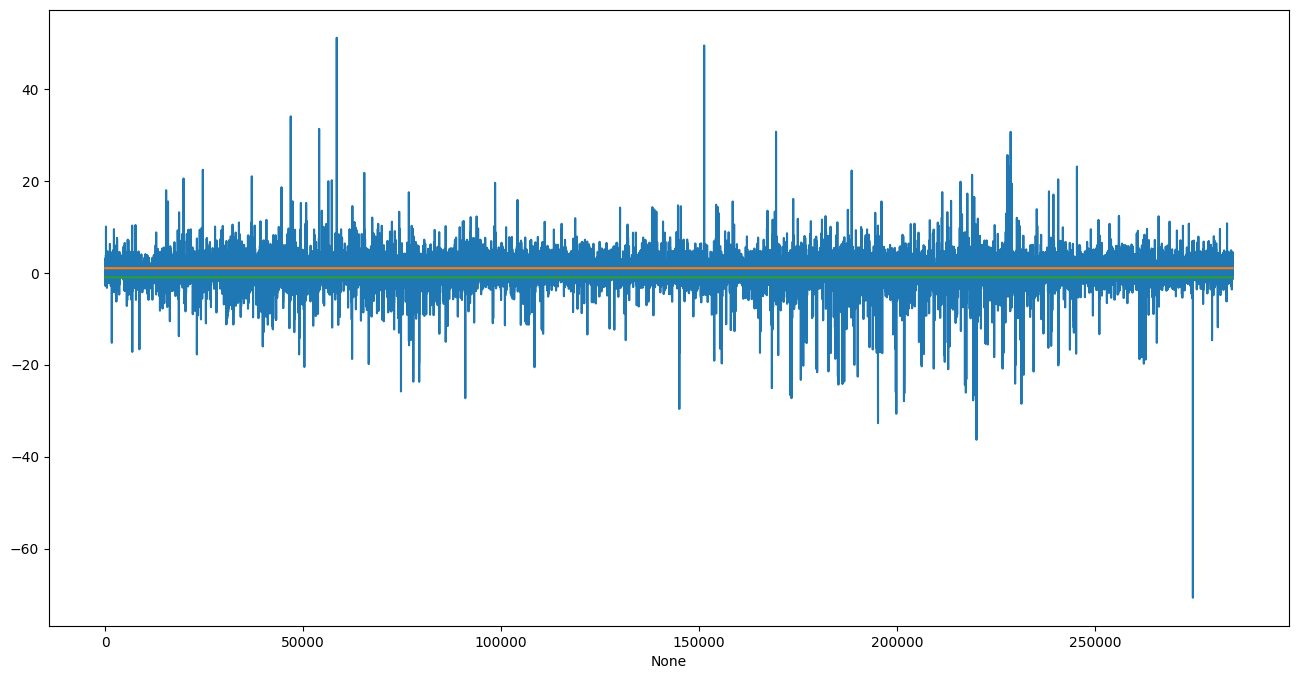

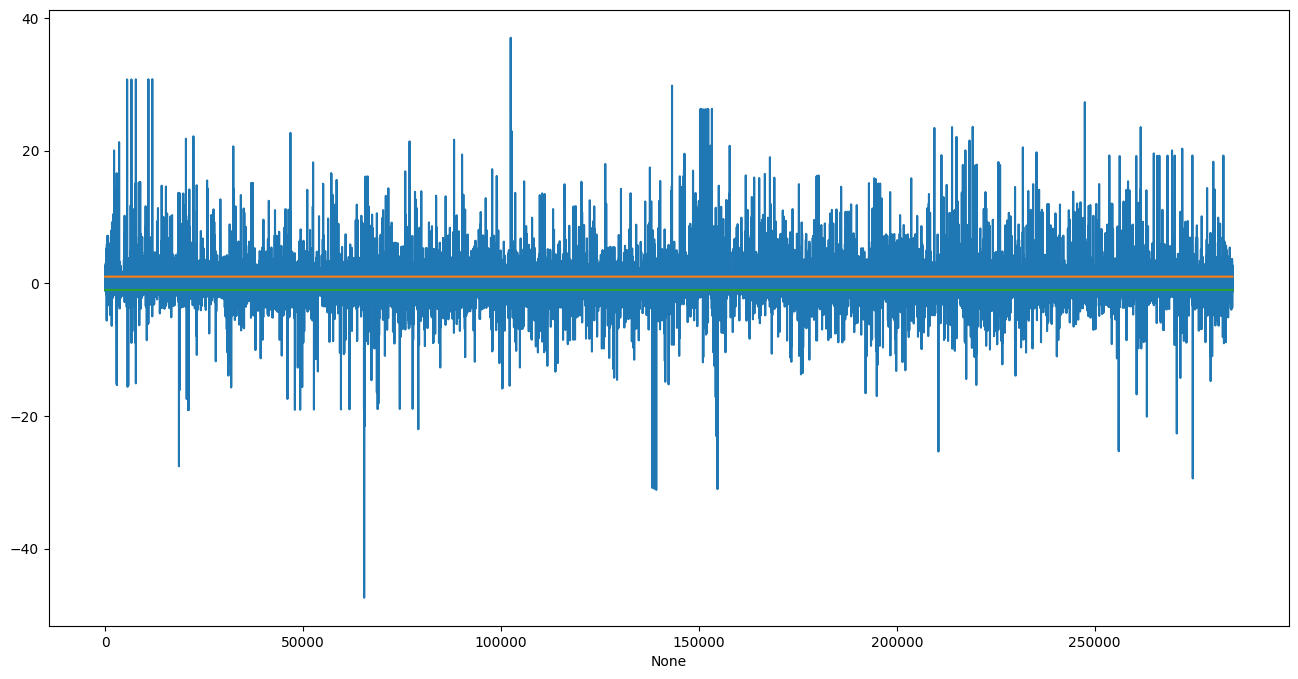

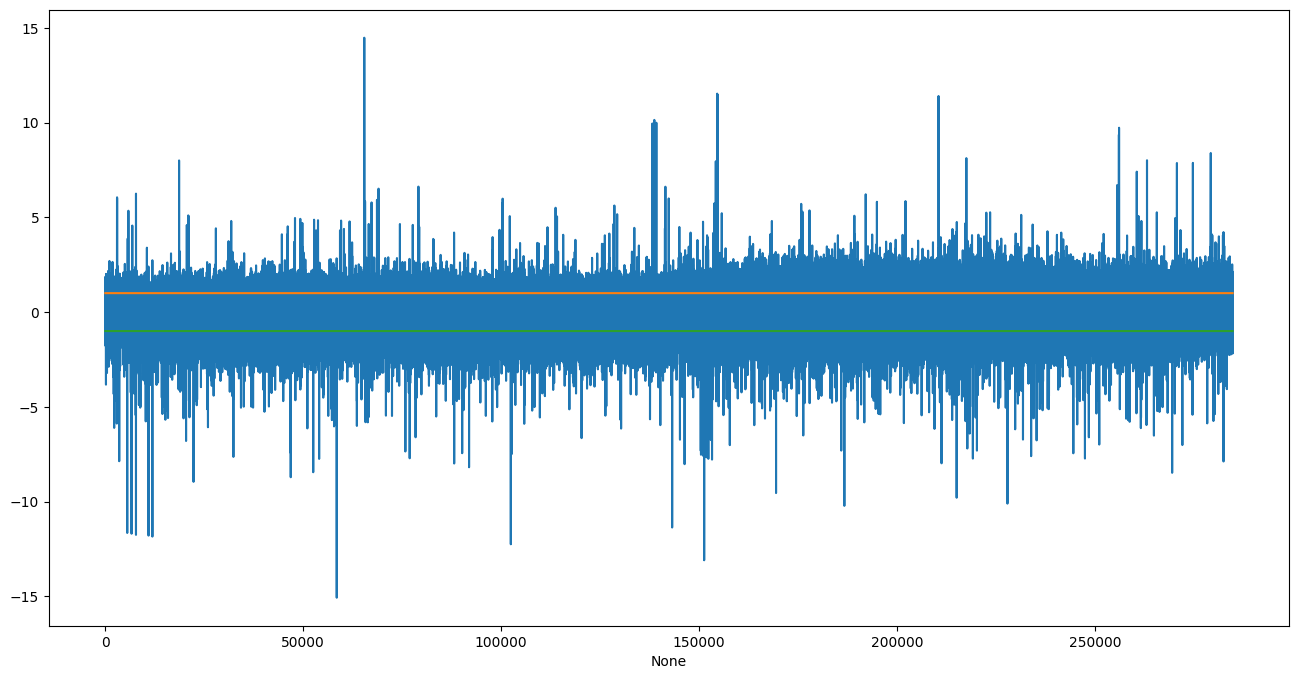

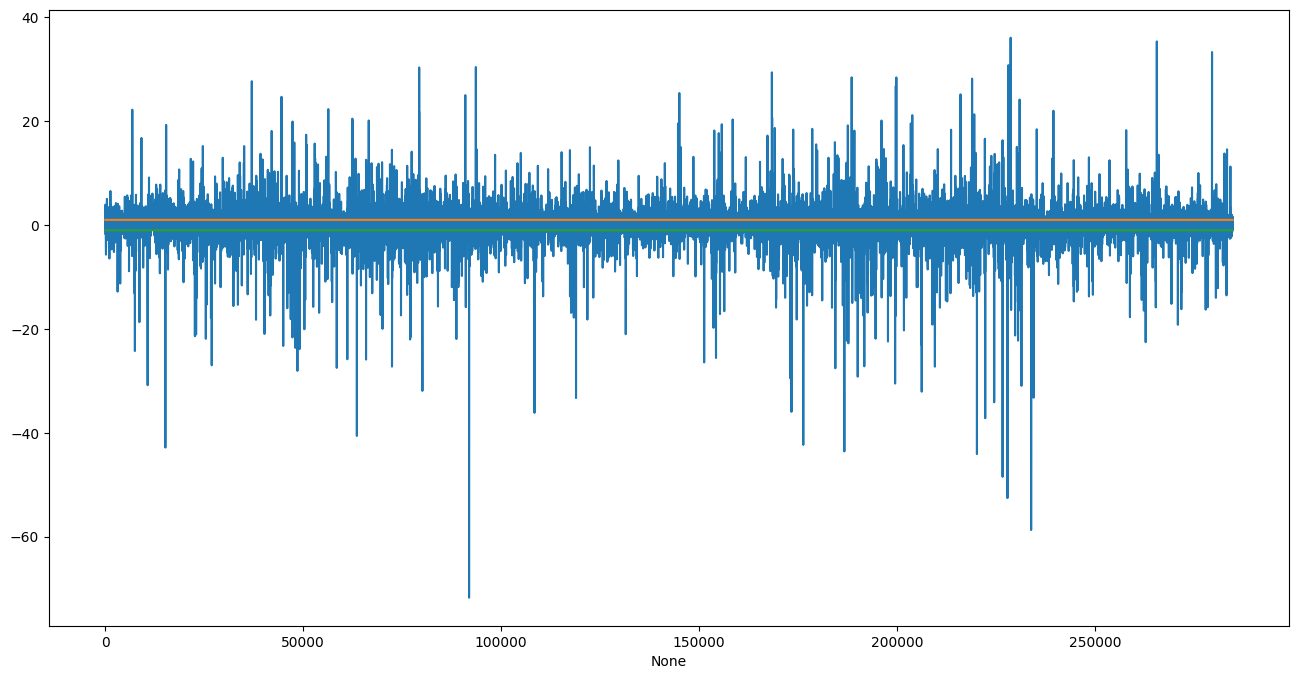

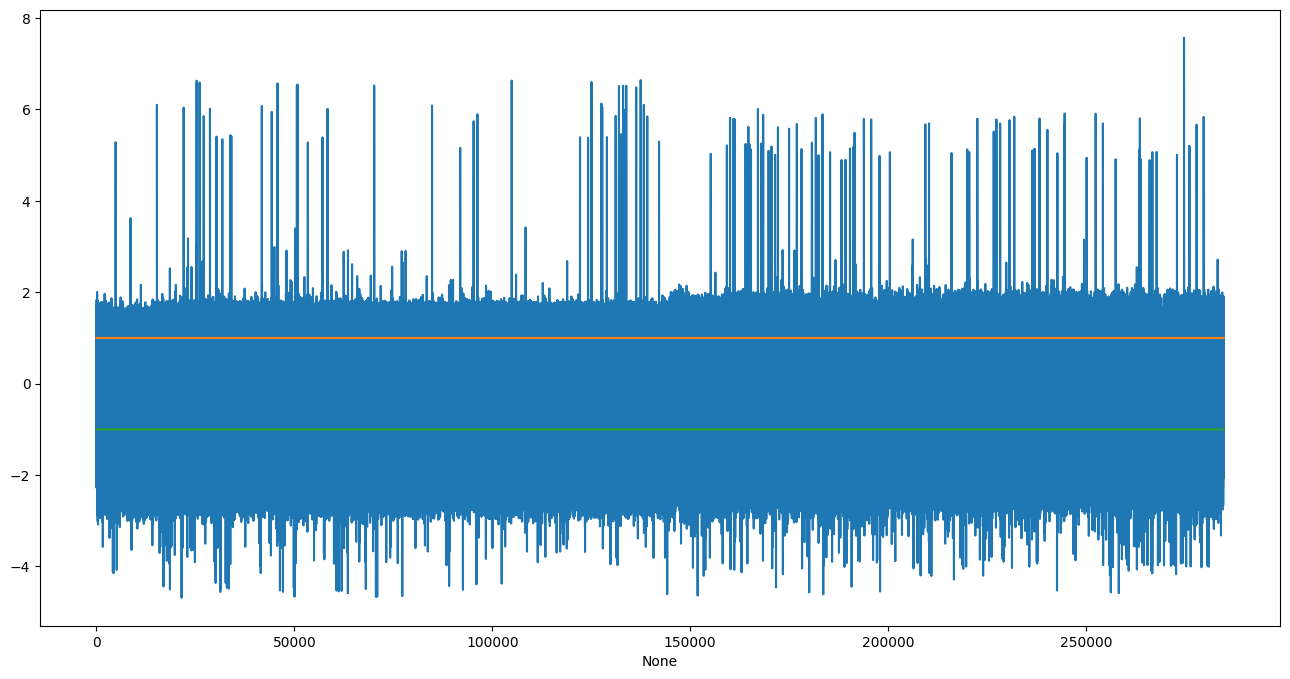

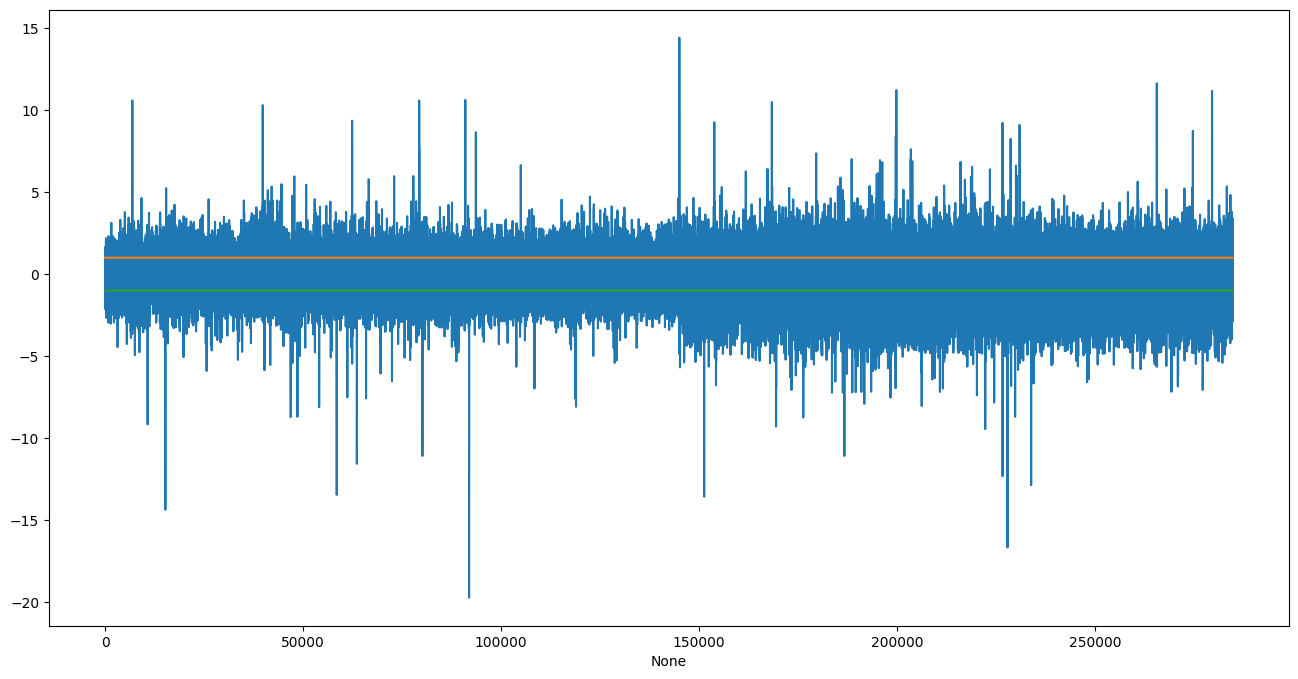

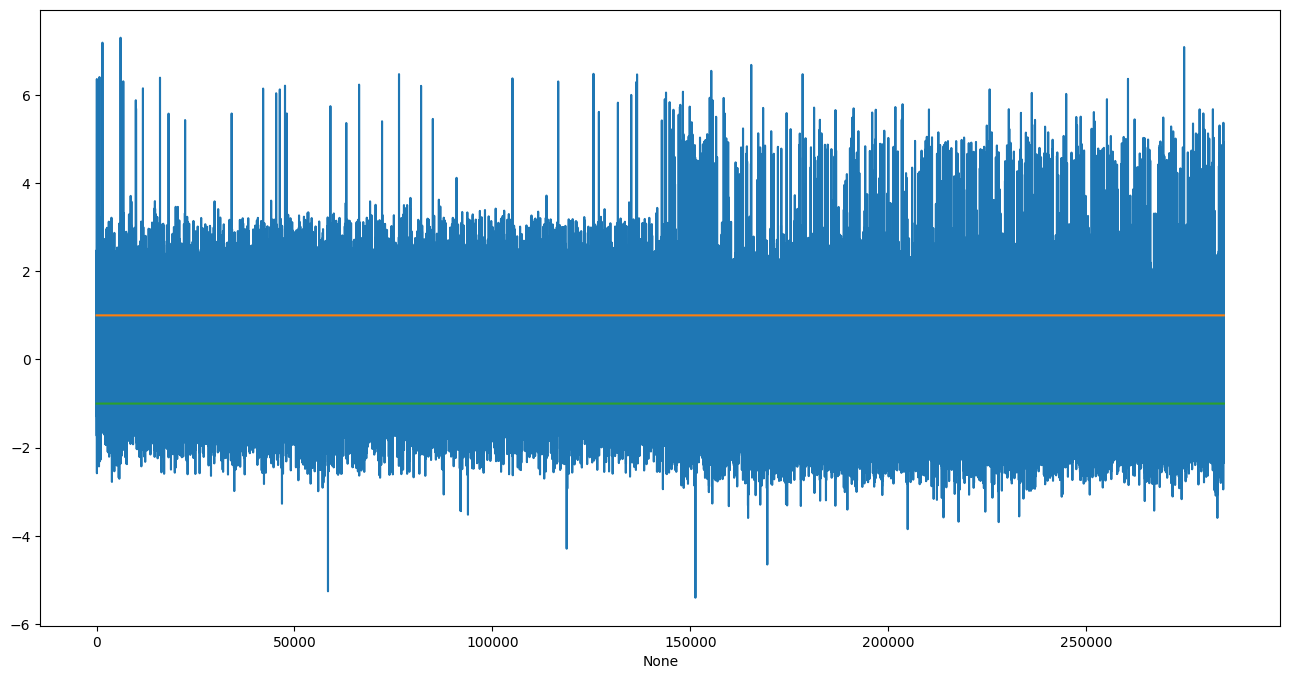

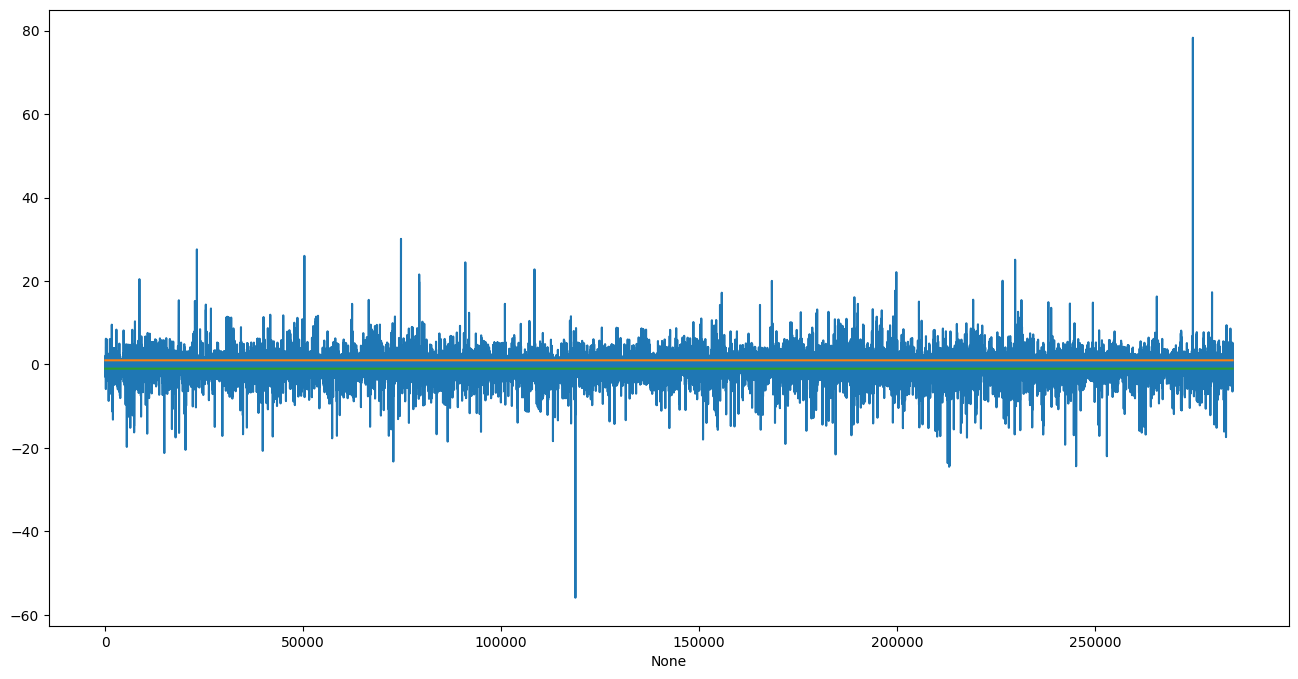

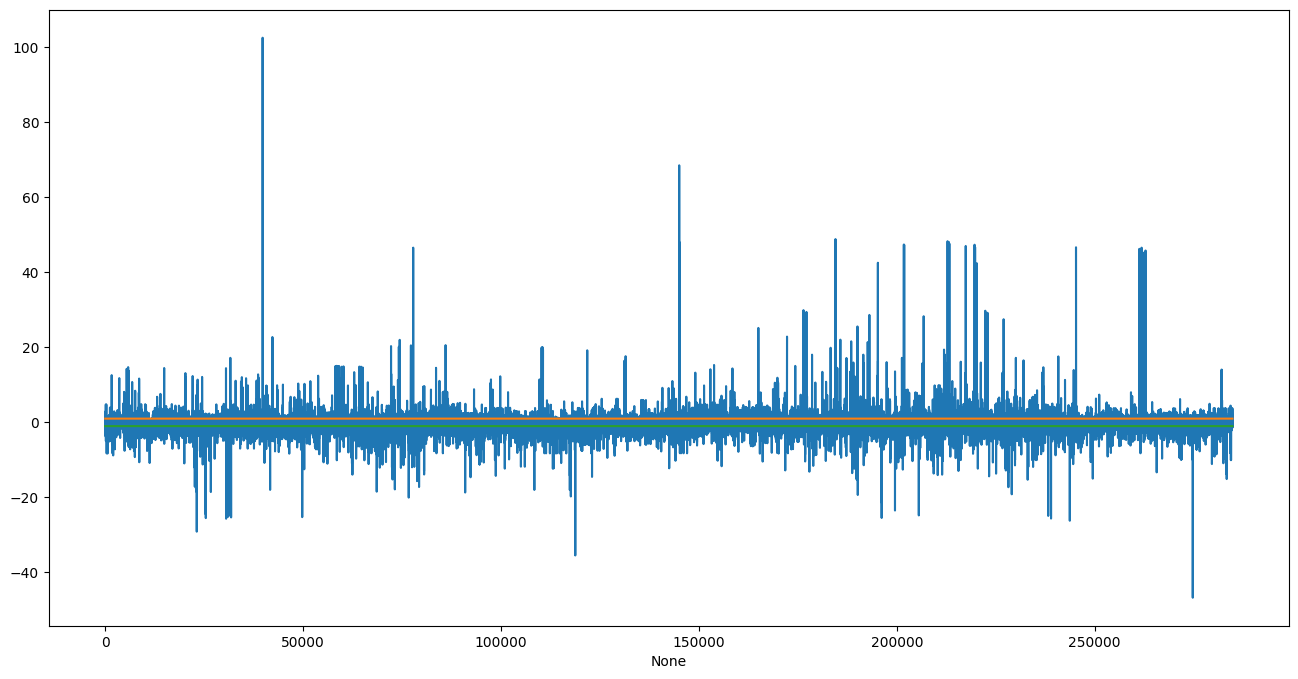

In [5]:
for column_name in data.columns[1:29]:
    plt.figure(figsize=(16, 8))
    plt.plot((data[column_name]-data[column_name].mean())/data[column_name].std())
    sns.lineplot(x=data.index, y=1)
    sns.lineplot(x=data.index, y=-1)
    plt.show()

## Задание 2: Поиск аномалий в данных кредитного скоринга

Используйте  набор данных кредитного скоринга ([прямая ссылка на данные Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)) и определите аномалии, используя методы Z-score или IQR. 

## Задание 3: Обнаружение аномалий в данных о температуре

В наборе данных о температуре в различных городах ([прямая ссылка на данные Kaggle](https://www.kaggle.com/smid80/weatherww2)) обнаружьте аномальные значения температуры.

In [6]:
data = pd.read_csv('data/Summary of Weather.csv', low_memory=False)
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

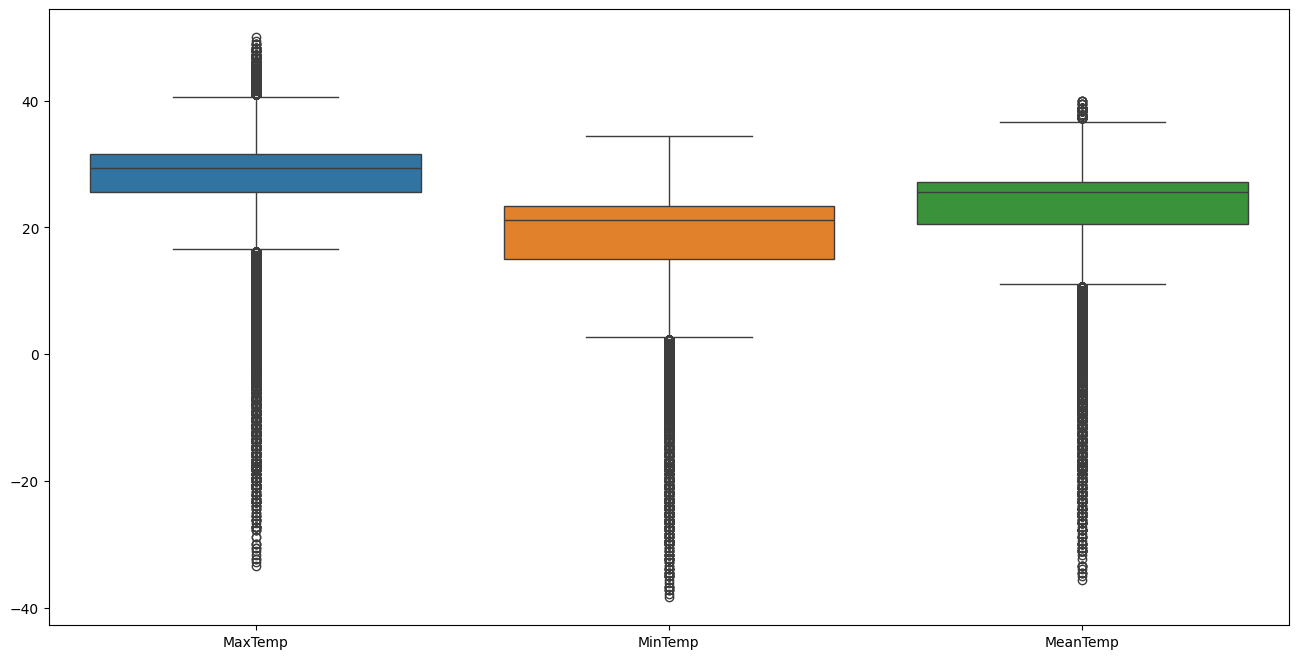

In [8]:
plt.figure(figsize=(16, 8))
sns.boxplot(data.iloc[:, 4:7])
plt.show()

In [9]:
data.iloc[:, 4:7].describe()

,MaxTemp,MinTemp,MeanTemp
count,119040.000000,119040.000000,119040.000000
mean,27.045111,17.789511,22.411631
std,8.717817,8.334572,8.297982
min,-33.333333,-38.333333,-35.555556
25%,25.555556,15.000000,20.555556
50%,29.444444,21.111111,25.555556
75%,31.666667,23.333333,27.222222
max,50.000000,34.444444,40.000000


## Задание 4: Прогнозирование пропущенных значений в данных о болезни диабета.

В данных о диабете Pima Indians (Kaggle: [ссылка на данные](https://www.kaggle.com/uciml/pima-indians-diabetes-database)) есть пропущенные значения. Воспользуйтесь методами регрессии или классификации для предсказания пропущенных значений.

In [60]:
data = pd.read_csv('data/diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [61]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
(data==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Нас интересуют столбцы

In [63]:
data.columns[1:6]

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [64]:
(data==0).sum()[data.columns[1:6]]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [67]:
train_data = data[data['Glucose'] != 0]
predict_data = data[data['Glucose'] == 0]

X_train = train_data[['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
y_train = train_data['Glucose']

X_pred = predict_data[['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [68]:
y_pred = LinearRegression().fit(X_train, y_train).predict(X_pred).astype(int)
y_pred

array([ 97, 102,  98, 134, 131])

In [69]:
data.loc[data[data['Glucose'] == 0].index, 'Glucose'] = y_pred

In [70]:
(data==0).sum()[data.columns[1:6]]

Glucose            0
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [71]:
train_data = data[data['BMI'] != 0]
predict_data = data[data['BMI'] == 0]

X_train = train_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
y_train = train_data['BMI']

X_pred = predict_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

y_pred = LinearRegression().fit(X_train, y_train).predict(X_pred).astype(int)

data.loc[data[data['BMI'] == 0].index, 'BMI'] = y_pred

(data==0).sum()[data.columns[1:6]]

Glucose            0
BloodPressure     35
SkinThickness    227
Insulin          374
BMI                0
dtype: int64

In [72]:
train_data = data[data['BloodPressure'] != 0]
predict_data = data[data['BloodPressure'] == 0]

X_train = train_data[['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
y_train = train_data['BloodPressure']

X_pred = predict_data[['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

y_pred = LinearRegression().fit(X_train, y_train).predict(X_pred).astype(int)

data.loc[data[data['BloodPressure'] == 0].index, 'BloodPressure'] = y_pred

(data==0).sum()[data.columns[1:6]]

Glucose            0
BloodPressure      0
SkinThickness    227
Insulin          374
BMI                0
dtype: int64

In [73]:
train_data = data[data['SkinThickness'] != 0]
predict_data = data[data['SkinThickness'] == 0]

X_train = train_data[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
y_train = train_data['SkinThickness']

X_pred = predict_data[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

y_pred = LinearRegression().fit(X_train, y_train).predict(X_pred).astype(int)

data.loc[data[data['SkinThickness'] == 0].index, 'SkinThickness'] = y_pred

(data==0).sum()[data.columns[1:6]]

Glucose            0
BloodPressure      0
SkinThickness      0
Insulin          374
BMI                0
dtype: int64

In [74]:
train_data = data[data['Insulin'] != 0]
predict_data = data[data['Insulin'] == 0]

X_train = train_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
y_train = train_data['Insulin']

X_pred = predict_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

y_pred = LinearRegression().fit(X_train, y_train).predict(X_pred).astype(int)

data.loc[data[data['Insulin'] == 0].index, 'Insulin'] = y_pred

(data==0).sum()[data.columns[1:6]]

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

## Задание 5: Обработка пропущенных значений

Используя набор данных о пассажирах Титаника из библиотеки Seaborn (sns.load_dataset('titanic')), необходимо найти и обработать все пропущенные значения. Можно использовать различные методы (например, удаление, заполнение средним значением или медианой). Сравнить результаты.

In [2]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Рассмотрим пропущенные значения в зависимости от столбцов

In [4]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Заполним значения столбца age. Для этого рассмотрим гистограмму распределения

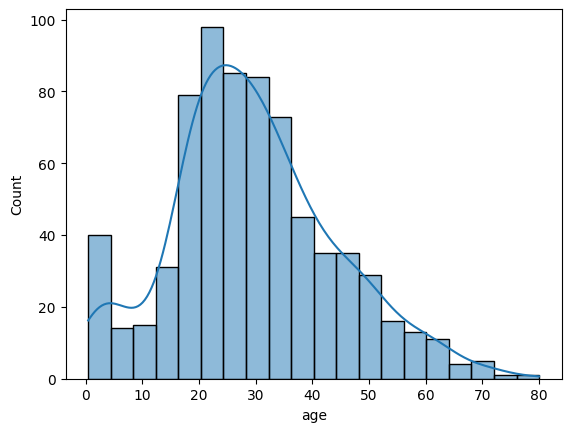

In [7]:
sns.histplot(data['age'], kde=True)
plt.show()

Распределение значений столбца ассиметрично, поэтому в качестве статистики для заполнения выберем медиану, поскольку она более устойчива к ассиметричности выборки.

In [9]:
data['age'] = data['age'].fillna(data['age'].median())

Заполним значения столбца deck. Для этого рассмотрим значения, содержащиеся в этом столбце

In [10]:
data['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

Заполним пропущенные значения этого столбца с помощью моды.

In [21]:
data['deck'].mode()

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [20]:
data['deck'] = data['deck'].fillna(data['deck'].mode()[0])

По аналогии поступим со столбцами embarked и embark_town

In [24]:
data['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
data['embarked'].mode()

0    S
Name: embarked, dtype: object

In [26]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

In [27]:
data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [28]:
data['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [29]:
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])

Теперь рассмотрим наличие пропущенных значений после заполнения

In [30]:
data.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# Задание 6: Нормализация и стандартизация признаков датасета "Red Wine Quality"

Для набора данных о качестве красного вина ([ссылка на данные](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)) примените различные методы нормализации и стандартизации к признакам, сравните результаты их применения.

In [82]:
data = pd.read_csv('data/winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [85]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data)
scaled_data = scaler.transform(data)

scaled_dataframe = pd.DataFrame(scaled_data, columns=data.columns)
scaled_dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [86]:
scaled_dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-1.244227e-16,2.132961e-16,-6.221137e-17,4.443669e-17,-3.473172e-14,2.861723e-15,6.754377e-16,1.066481e-16,8.887339e-17
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00,-3.265165e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01,-7.878226e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01,4.508484e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01,4.508484e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00,2.928190e+00


In [91]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
min_max_scaled_data = min_max_scaler.transform(data)

min_max_scaled_dataframe = pd.DataFrame(min_max_scaled_data, columns=data.columns)
min_max_scaled_dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


In [92]:
min_max_scaled_dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
max_abs_scaled_data = preprocessing.MaxAbsScaler().fit(data).transform(data)
max_abs_scaled_dataframe = pd.DataFrame(max_abs_scaled_data, columns=data.columns)
max_abs_scaled_dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,0.625
1,0.490566,0.556962,0.00,0.167742,0.160393,0.347222,0.231834,0.993135,0.798005,0.340,0.657718,0.625
2,0.490566,0.481013,0.04,0.148387,0.150573,0.208333,0.186851,0.993335,0.812968,0.325,0.657718,0.625
3,0.704403,0.177215,0.56,0.122581,0.122750,0.236111,0.207612,0.994331,0.788030,0.290,0.657718,0.750
4,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.389937,0.379747,0.08,0.129032,0.147300,0.444444,0.152249,0.991242,0.860349,0.290,0.704698,0.625
1595,0.371069,0.348101,0.10,0.141935,0.101473,0.541667,0.176471,0.991462,0.877805,0.380,0.751678,0.750
1596,0.396226,0.322785,0.13,0.148387,0.124386,0.402778,0.138408,0.992079,0.852868,0.375,0.738255,0.750
1597,0.371069,0.408228,0.12,0.129032,0.122750,0.444444,0.152249,0.991810,0.890274,0.355,0.684564,0.625


In [97]:
max_abs_scaled_dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.523248,0.334064,0.270976,0.163794,0.143153,0.220485,0.160788,0.993082,0.825714,0.329074,0.699529,0.704503
std,0.109503,0.113329,0.194801,0.090963,0.077030,0.145280,0.113825,0.001880,0.038500,0.084753,0.071521,0.100946
min,0.289308,0.075949,0.000000,0.058065,0.019640,0.013889,0.020761,0.986430,0.683292,0.165000,0.563758,0.375000
25%,0.446541,0.246835,0.090000,0.122581,0.114566,0.097222,0.076125,0.991940,0.800499,0.275000,0.637584,0.625000
50%,0.496855,0.329114,0.260000,0.141935,0.129296,0.194444,0.131488,0.993086,0.825436,0.310000,0.684564,0.750000
75%,0.578616,0.405063,0.420000,0.167742,0.147300,0.291667,0.214533,0.994167,0.847880,0.365000,0.744966,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Задание 7: Применение описательной статистики и корреляционного анализа для датасета "House Prices"

На данных о ценах на жилье ([ссылка на данные](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)) рассчитайте основные метрики описательной статистики для числовых переменных и рассчитайте корреляции между переменными. Визуализируйте корреляции с помощью тепловых карт и обратите внимание на сильные корреляции.

In [98]:
data = pd.read_csv('data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [101]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [102]:
numeric_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


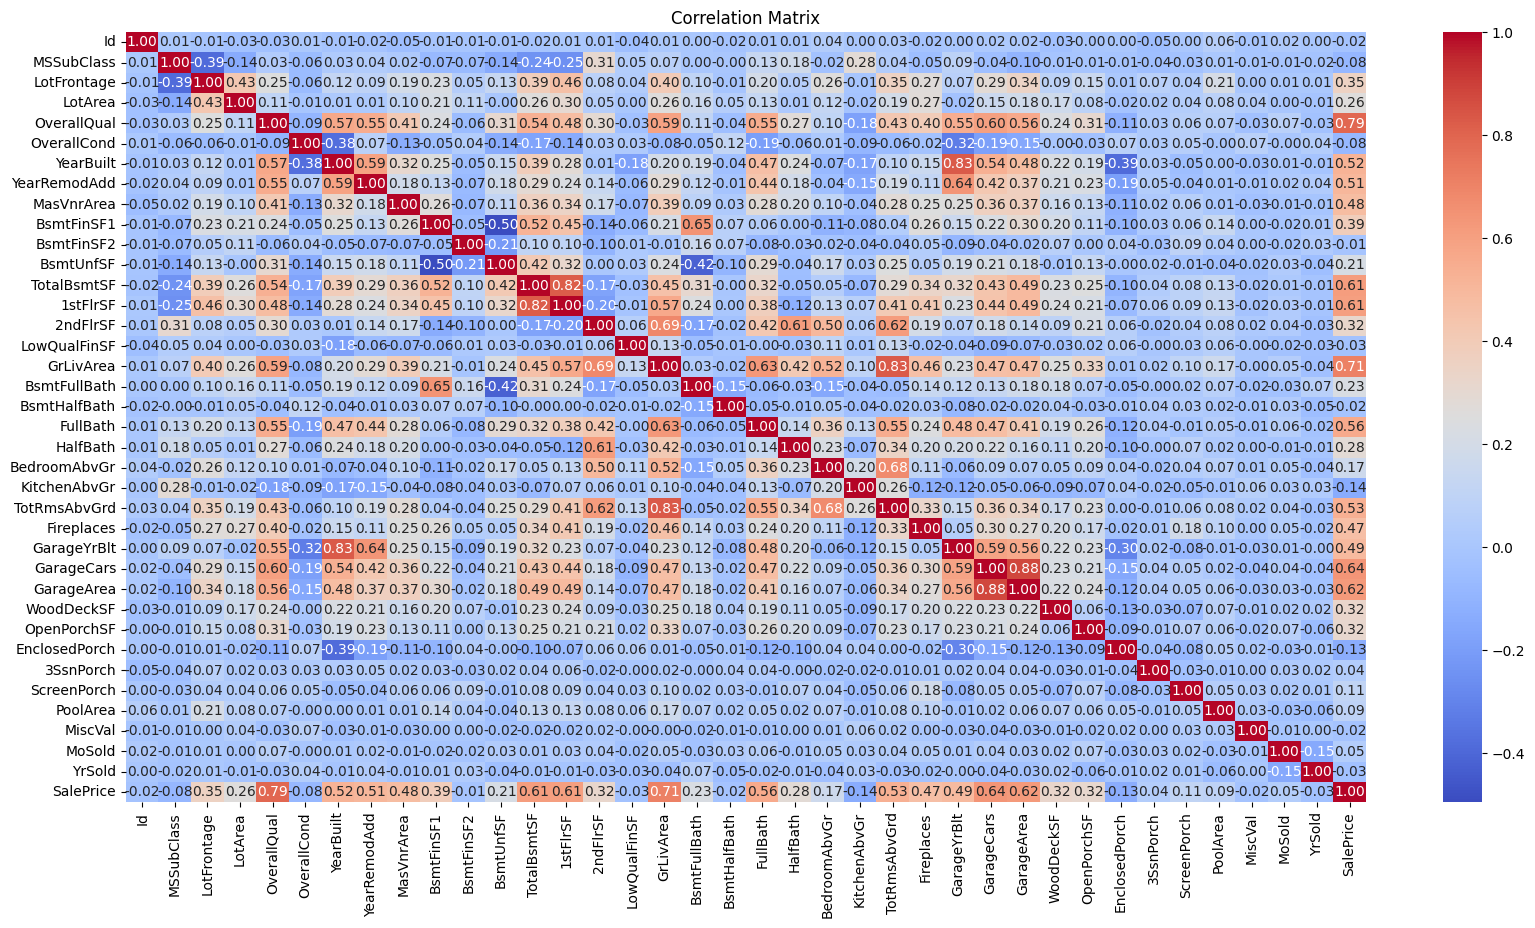

In [105]:
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Задание 8: Обработка текстовых данных в датасете "Twitter Airline Sentiment"

Набор данных "Twitter Airline Sentiment" на Kaggle ([ссылка на данные](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)) содержит реальные твиты о различных авиакомпаниях. Примените техники предобработки текста, вроде удаления стоп-слов, стемминга, лемматизации и векторизации для подготовки данных к анализу.

In [2]:
data = pd.read_csv('data/Tweets.csv')
data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import re
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/bzzdwn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/bzzdwn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [5]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|@\S+|[^a-zA-Z\s]", '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words if word not in stop_words]
    
    return ' '.join(words)

In [6]:
data['processed_text'] = data['text'].apply(preprocess_text)

In [8]:
data['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [7]:
data['processed_text']

0                                                     said
1                        plu youv ad commerci experi tacki
2               didnt today must mean need take anoth trip
3        realli aggress blast obnoxi entertain guest fa...
4                                     realli big bad thing
                               ...                        
14635                      thank got differ flight chicago
14636    leav minut late flight warn commun minut late ...
14637                plea bring american airlin blackberri
14638    money chang flight dont answer phone suggest m...
14639    ppl need know mani seat next flight plz put u ...
Name: processed_text, Length: 14640, dtype: object

In [113]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['processed_text'])

In [116]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,aa,aaaand,aaadvantag,aaalwaysl,aaba,aacom,aadavantag,aadelay,aadfw,aadv,...,zigzag,zip,zipper,zombi,zone,zoom,zrh,zuke,zurich,zurichnew
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
